In [9]:
import json
from pyspark.sql.functions import *
import pyspark.sql.functions as fs

keyconv = "org.apache.spark.examples.pythonconverters.ImmutableBytesWritableToStringConverter"
valueconv = "org.apache.spark.examples.pythonconverters.HBaseResultToStringConverter"
conf = {
    "hbase.zookeeper.quorum": "cdh1:2181",
    "hbase.mapreduce.inputtable": "fault_history",
    "hbase.mapreduce.scan.column.family": "A",
    #B:"a01"为16进制的原始数据
#    "hbase.mapreduce.scan.columns": "A:a01",
}
#conf["hbase.mapreduce.scan.row.start"] = "LEWPCA100JF260246__2019-10-29 00:00:00"
#conf["hbase.mapreduce.scan.row.stop"] = "LEWPCA100JF260246__2019-10-29 23:59:59" 
rdd = sc.newAPIHadoopRDD(
    "org.apache.hadoop.hbase.mapreduce.TableInputFormat",
    "org.apache.hadoop.hbase.io.ImmutableBytesWritable",
    "org.apache.hadoop.hbase.client.Result",
    keyConverter=keyconv,
    valueConverter=valueconv,
    conf=conf,
)

rdd.first()

('LEWKMH123JF255003__0000000001__2019-11-11 16:35:59',
 '{"qualifier" : "a01", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "LEWKMH123JF255003"}\n{"qualifier" : "a02", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "0000000001"}\n{"qualifier" : "a03", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "2019-11-11 16:35:59"}\n{"qualifier" : "a04", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "2019-11-11 16:35:59"}\n{"qualifier" : "b01", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "1"}\n{"qualifier" : "b02", "timestamp" : "

In [86]:
#rdd_v=rdd.flatMapValues(lambda v:v.split('\n'))
rdd11=rdd.values().map( lambda x: x.split("\n") )
# for row in rdd11:
#     print (row)
    
#rdd12=rdd11.foreach(x)

#rdd12=rdd11.mapValues(lambda x:x.split(','))
#rdd12=json.loads(rdd11)
# for qualifier in rdd_v:
#     print(qualifier)
#json.loads( rdd11.map(lambda x:x.split(',').tosting))
 #   print     
    
rdd11.first()
#rdd12.first()

['{"qualifier" : "a01", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "LEWKMH123JF255003"}',
 '{"qualifier" : "a02", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "0000000001"}',
 '{"qualifier" : "a03", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "2019-11-11 16:35:59"}',
 '{"qualifier" : "a04", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "2019-11-11 16:35:59"}',
 '{"qualifier" : "b01", "timestamp" : "1573461360545", "columnFamily" : "A", "row" : "LEWKMH123JF255003__0000000001__2019-11-11 16:35:59", "type" : "Put", "value" : "1"}',
 '{"qualifier" : "b02", "timestamp" : "1573461360545", "columnFamily" : "A", "r

In [10]:
chart = {   
    'a01': 'vin', 
    'a02': 'unique_code',
    'a03': 'obd_time',
    'a04': 'receive_time',    
    'b01': 'alert_level',
    'b02': 'alarm_type',
    'b03': 'alert_type',
    'b04': 'source_type', 
    'b05': 'fault_code',    
    'c01': 'alert_lat',
    'c02': 'alert_lng',
    'c03': 'alert_address'
}


In [11]:
result = rdd.values() \
            .map(lambda row: dict( (chart.get( json.loads(item).get("qualifier") ),json.loads(item).get("value")  #获取指定值
#              .replace('"', "temp_data")
#              .replace("'", '"')
#              .replace("temp_data", "'")
             ) for item in row.split("\n") ) )
result.first()
#定义字典，将rdd的值取出赋值给字典

{'alarm_type': 'fault',
 'alert_address': '',
 'alert_lat': '25.064538',
 'alert_level': '1',
 'alert_lng': '99.029994',
 'alert_type': 'hc_output_current',
 'fault_code': '2',
 'obd_time': '2019-11-11 16:35:59',
 'receive_time': '2019-11-11 16:35:59',
 'source_type': 'battery_fault_codes',
 'unique_code': '0000000001',
 'vin': 'LEWKMH123JF255003'}

In [14]:
df=result.toDF()
#df1=df.collect()
#print(df1)

/Users/ppx/workspace/spark-2.4.4-bin-hadoop2.7/python/pyspark/sql/session.py:366: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [15]:
#拆分时间代码
split_col=fs.split(df['obd_time'],' ')
df=df.withColumn('date',split_col.getItem(0))
df=df.withColumn('time',split_col.getItem(1))
df.show()
type(df)
#df.write.format("parquet").save("\\Users\\ppx\\Desktop")

+----------+-------------+---------+-----------+---------+-----------------+----------+-------------------+-------------------+-------------------+-----------+-----------------+----------+--------+
|alarm_type|alert_address|alert_lat|alert_level|alert_lng|       alert_type|fault_code|           obd_time|       receive_time|        source_type|unique_code|              vin|      date|    time|
+----------+-------------+---------+-----------+---------+-----------------+----------+-------------------+-------------------+-------------------+-----------+-----------------+----------+--------+
|     fault|             |25.064538|          1|99.029994|hc_output_current|         2|2019-11-11 16:35:59|2019-11-11 16:35:59|battery_fault_codes| 0000000001|LEWKMH123JF255003|2019-11-11|16:35:59|
|     fault|             |26.225339|          1|99.602459|hc_output_current|         2|2019-11-11 16:36:09|2019-11-11 16:36:09|battery_fault_codes| 0000000001|LEWKMH123JF255003|2019-11-11|16:36:09|
|     faul

pyspark.sql.dataframe.DataFrame

In [19]:
from pyspark.mllib.regression import *
from pyspark.mllib.classification import *
from pyspark.ml.classification import LogisticRegression
#建立模型
rdd = df.rdd
lrm=LogisticRegressionWithSGD.train(rdd,iterations=10)



TypeError: data should be an RDD of LabeledPoint, but got <class 'pyspark.sql.types.Row'>

In [138]:
#spark.read.format("libsvm").load("/Users/ppx/Desktop/test.txt")

In [29]:
from pyspark.mllib.clustering import KMeans, KMeansModel
data=[
    LabeledPoint(1.0,[0.0,1.0]),
    LabeledPoint(0.0,[1.0,0.0]),
]

lrm=LinearRegressionWithSGD.train(sc.parallelize(data),iterations=100)
lrm.predict([0,1])


data1=[LabeledPoint(25,178,134),
       LabeledPoint(31,167,120)
      ]
#kms=

TypeError: __init__() takes 3 positional arguments but 4 were given

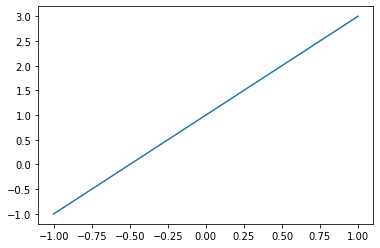

In [7]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

x=np.linspace(-1,1,50)
y=2*x+1
plt.figure()
plt.plot(x,y)
plt.show()

#读取MySQL数据
# con = pymysql.connect(host="cdh1",user="root",password="root",db="jdbc")
# pd.read_sql('select * from new_energy_obd_info',con)

#
#df.

In [79]:
from numpy import array
#from pyspark.mll import *

data=sc.textFile("hdfs://cdh1:8020/user/hbase/2019-10-31/vin=LDPBAAKB9JN401989/")
data.collect()
dd=data.map(lambda line: array([float(x) for x in line.split("|")]))
#kMeans.train(dd,maxIterations=10, initializationMode="random")


In [80]:
data.first()

'{"accelerator":"3","battery_cell_consistency_low_alert":"False","battery_cell_voltage_highest_value":"3.95","battery_cell_voltage_lowest_value":"3.94","battery_fault_codes":"[]","battery_faults_count":"0","battery_high_temperature_alert":"False","brake":"0","braking_system_alert":"False","can_brake":"False","can_drive":"True","car_status":"\\\\xE5\\\\x90\\\\xAF\\\\xE5\\\\x8A\\\\xA8","charge_status":"\\\\xE6\\\\x9C\\\\xAA\\\\xE5\\\\x85\\\\x85\\\\xE7\\\\x94\\\\xB5","current":"1.9","dc_dc_status":"\\\\xE5\\\\xB7\\\\xA5\\\\xE4\\\\xBD\\\\x9C","dc_dc_status_alert":"False","dc_dc_temperature_alert":"False","east_or_west":"\\\\xE4\\\\xB8\\\\x9C\\\\xE7\\\\xBB\\\\x8F","energy_storage_device_high_voltage_alert":"False","energy_storage_device_low_voltage_alert":"False","energy_storage_device_over_charge_alert":"False","engine_fault_codes":"[]","engine_faults_count":"0","gear":"\\\\xE5\\\\x80\\\\x92\\\\xE6\\\\x8C\\\\xA1","highest_alert_level":"\\\\xE6\\\\x97\\\\xA0\\\\xE6\\\\x95\\\\x85\\\\xE9\\\\x

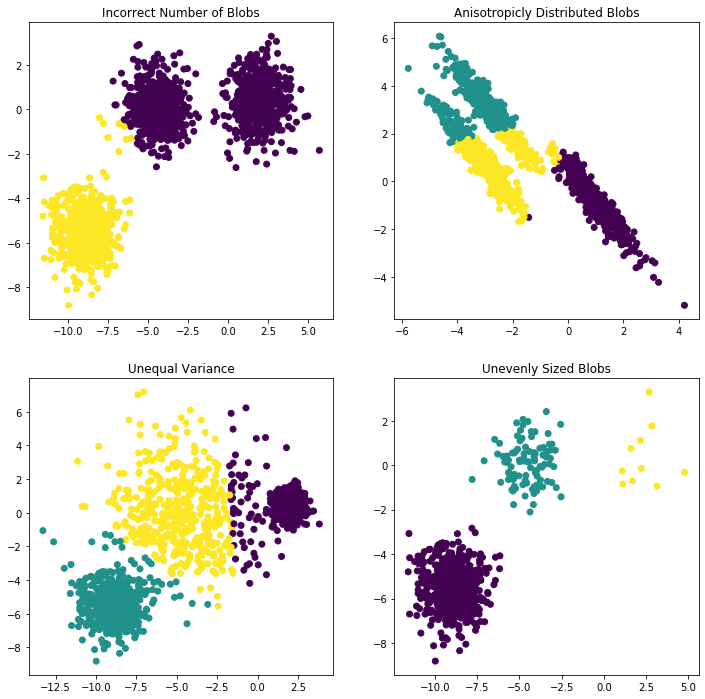

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#figsize(宽,高)绘图的宽高
plt.figure(figsize=(12, 12))

n_samples = 1500  
random_state = 170
# make_blobs(在簇之间平均分配的样本总数,数据集的随机数生成)：生成各向同性的高斯斑点以进行聚类。
# X:生成的样本，y：每个样本的群集成员的整数
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# n_clusters:簇数及生成的质心数 fit():计算聚类中心并预测每个样本的聚类索引
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

#subplot():在当前图像上添加一个子图。表2行2列索引为1
plt.subplot(221)

#scatter():y和x随散点图大小和、或颜色变化，[:,0]表示第一维取所有数据，第二维取0个数据
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# title("标题名称"):标题
plt.title("Incorrect Number of Blobs")


transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
# dot():两个数组的点积
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")


# make_blobs():生成各向同性的高斯斑点进行聚类，cluster_std:聚类的标准偏差
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

#vstack():将参数的每个元素垂直排列
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

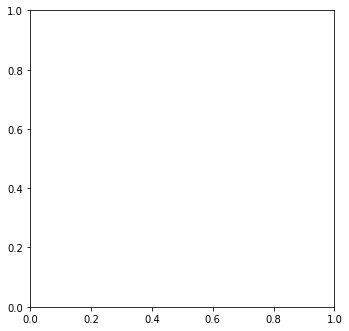

In [75]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)

plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.subplot(222)


In [95]:
import numpy as np
from sklearn.decomposition import PCA
# PCA(n_components= , #要保留的组件数。如果未设置n_components，则保留所有组件
#     copy= , #如果为False，则传递给fit的数据将被覆盖
#     whiter=
#     svd_solver=
#     tol=
#     iterated_power=
#     random_state=
    
# )

In [100]:

pca=PCA(n_components=2).fit(X) #


print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[1. 0.]
[1.41421356 0.        ]
